# Лабораторная работа по A* [решение]

В данной работе вам предстоит реализовать алгоритм A* для поиска пути для робота, передвигающегося на клетчатом поле. Каждая клетка может быть свободной или заблокированной препятствием, робот может ходить только по свободным клеткам. Поле предполагается $4$-ёх связным, что означает, что из каждой клетки робот может сходить в $4$ соседних: сверху, снизу, справа, слева (при условии, что они свободны). Стоимости переходов во всех соседей одинаковы (можно считать, равны $1$).

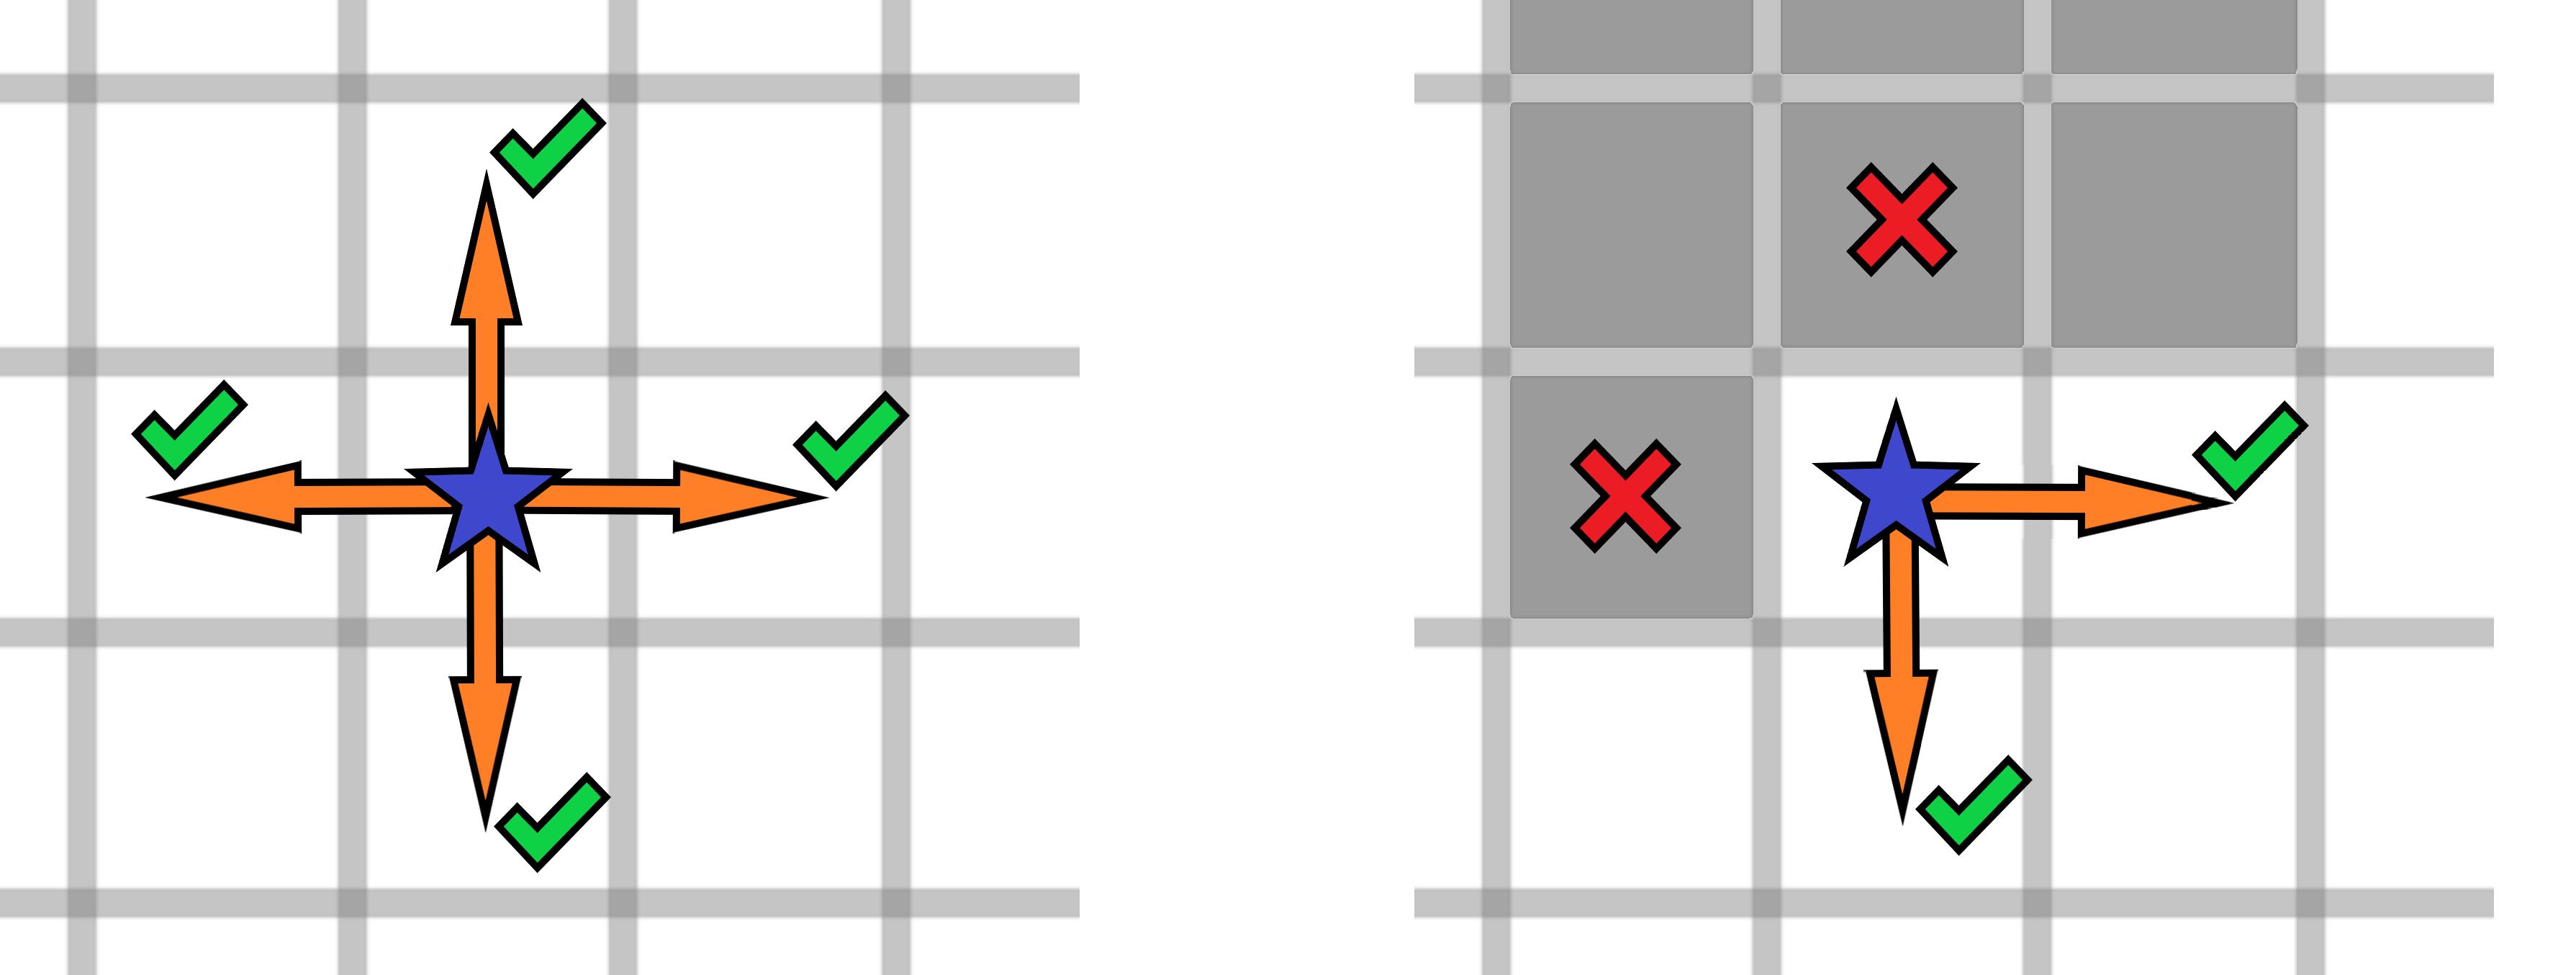

Основной код уже написан, вам же остаётся только реализовать вспомогательные функции (получение соседей, проверка коллизии и тд), а также сам алгоритм A*. Для этого достаточно заполнить пропуски, отмеченные надписью `# CODE HERE`.

Если у вас всё получится, то в конце сможете поиграться с красивой визуализацией! Даже двумя...

#### Напоминание алгоритма A*

Алгоритм для поиска оптимального (кратчайшего) пути на ориентированном взвешенном графе из конкретного старта в один (или несколько конкретных) финишей. Веса рёбер (переходов между вершинами) в графе должны быть неотрицательными.

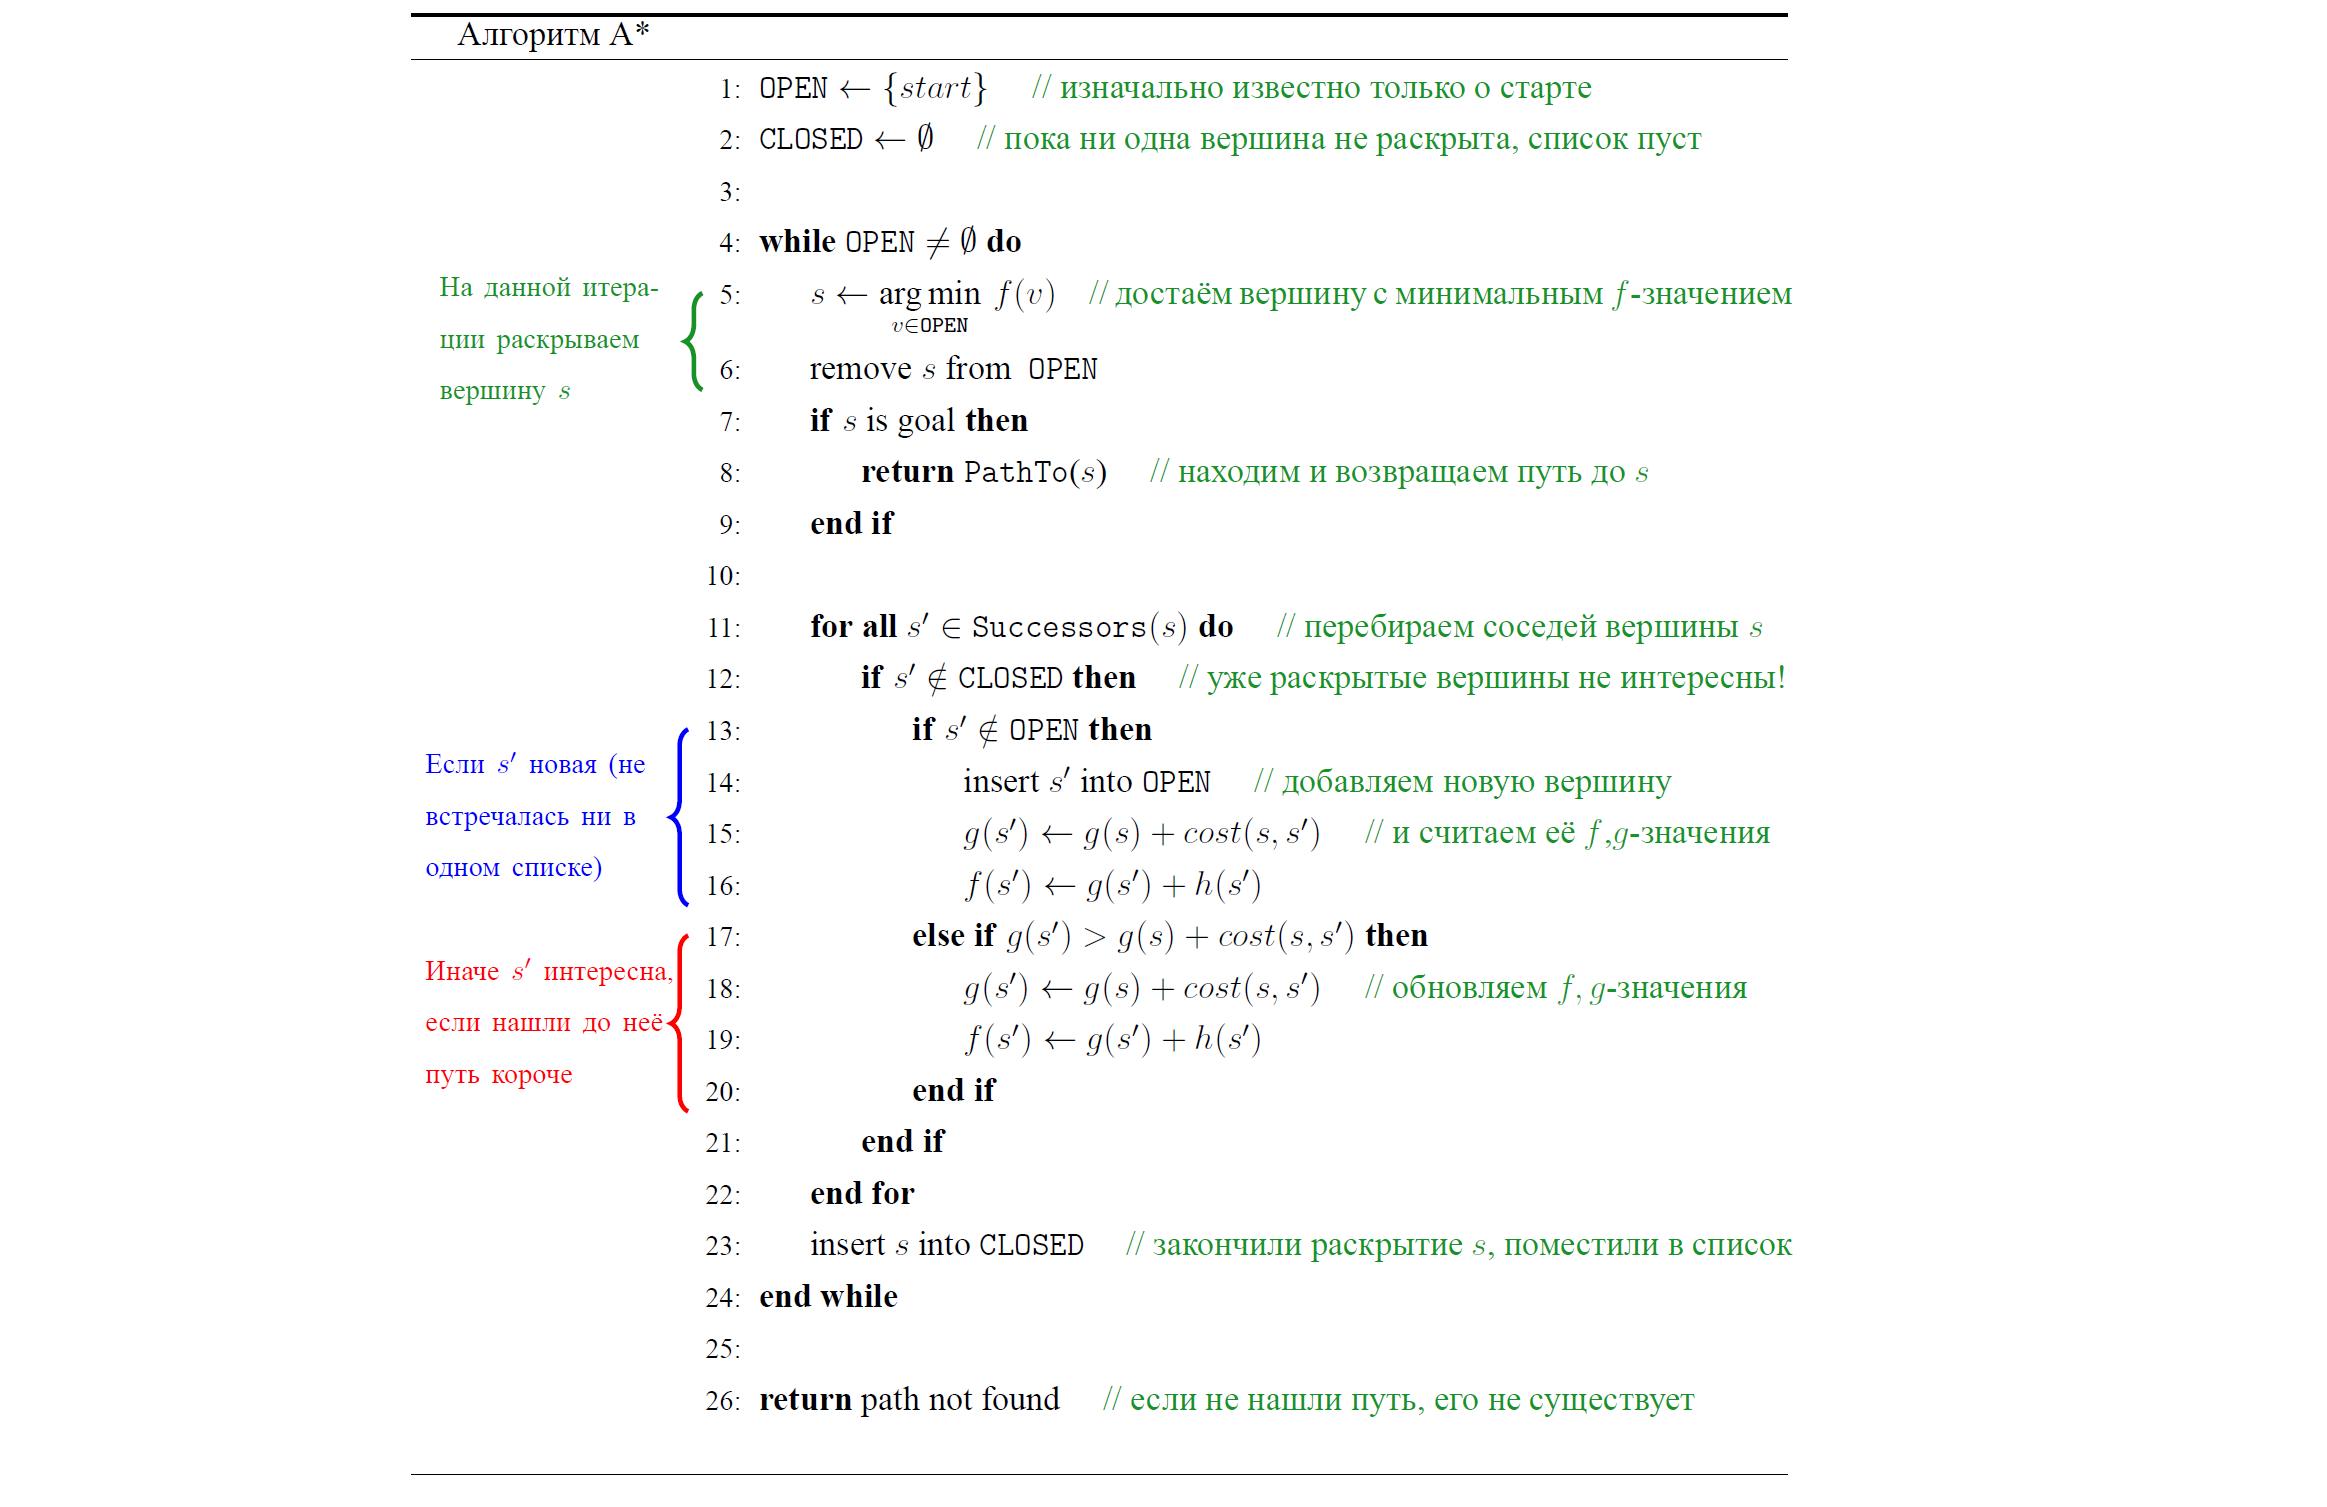

Список `OPEN` содержит вершины, до которых мы уже можем добраться хоть как-то (то есть до которых известен путь, не обязательно оптимальный). Изначально в этом списке только одна вершина — старт. И алгоритм A*, и алгоритм Дейкстры работают итерациями. На каждой итерации они извлекают одну вершину $s$ из списка `OPEN` и *раскрывают* её, то есть находят/обновляют пути в соседей $s$ через неё саму: если мы знаем путь в вершину $s$ (а мы его знаем, раз вершина была в списке `OPEN`), то мы можем продлить его на одно ребро, построив путь в соседа $s$. Таким образом, в процессе раскрытия вершины $s$ все её соседи (если ещё не были) попадают в список `OPEN`, а до тех, которые в нём уже были, мы просто находим ещё один путь (возможно более короткий, чем был, тогда его запоминаем). Раскрытую вершину помещаем в список `CLOSED`. Далее итерации повторяются.

Заслуга Дейкстры в том, что он формально доказал, что на каждой итерации нужно брать для раскрытия из `OPEN` вершину с кратчайшим известным до неё путём. В этом случае этот путь будет всегда оптимальным, а потому список `CLOSED` (куда вершина попадёт после раскрытия) оказывается списком вершин, до которых уже найден оптимальный путь.

Алгоритм Дейкстры прекрасно ищет кратчайшие пути от старта до всех вершин, но иногда мы хотим искать кратчайший путь лишь до одного (или нескольких) финиша. В этом случае нам необходимо ждать, когда мы извлечём этот финиш для раскрытия (ведь тогда до него уже известен кратчайший путь, как гарантирует Дейкстра), однако это может быть долго. Для этого появился алгоритм A*, который добавляет к идеям алгоритма Дейкстры эвристическую функцию $h(\cdot)$, которая для каждой вершины $s$ хранит оценку $h(s)$ стоимости кратчайшего пути от неё до финиша. Оказалось, что теперь можно брать для раскрытия вершины из `OPEN` с минимальным $f$-значением (= сумма кратчайшего известного пути + оценки $h$) и все гарантии от Дейкстры сохранятся (если эвристическая функция достаточно хорошая, то есть *монотонная* (consistent)). Зато теперь мы приоритезируем внутри `OPEN` вершины вблизи финиша (у них эвристическая оценка $h$ будет меньше), фокусируя на нём поиск и таким образом достигая финиша гораздо быстрее классической Дейкстры (финиш будет извлечён из `OPEN` быстрее).

**Замечание:** Поскольку в рамках этой работы мы считаем эвристику $h$ хорошей (монотонной!), то для вершин в `CLOSED` гарантированно уже известен путь кратчайшей длины от старта. Именно поэтому в строке `12` псевдокода нас такие вершины больше не интересуют. Однако в общем случае, если эвристика произвольная, вершины из `CLOSED` могут быть перераскрыты.

**Замечание 2:** Монотонная эвристика (Consistent heuristic) — это такая, которая удовлетворяет следующему условию. Для любой вершины $s$ и её потомка $p$ выполняется неравенство $h(s) \leq h(p) + c(s, p)$, где $c(s,p)$ — стоимость перехода от $s$ к $p$. Чтобы зафиксировать масштаб также часто требуют, чтобы $h(finish) = 0$.


<div align="center">
    <img src="attachments/dijkstra-vs-astar.png" alt="image.png" />
    <br>
    <p style="font-size: small; color: gray; margin-top: 10px;">
        Эта фигура показывает разницу между алгоритмами Дейкстры (A) и A* (B). Путь будет 
        исследован от стартовой вершины (зелёной) через раскрываемые вершины (синие) к целевой 
        вершине, финишу (желтой). С помощью эвристики алгоритм A* фокусирует поиск, раскрывая вершины в сторону финиша, а потому находит цель с меньшим количеством итераций.
        <br>
        <i>Картинка из статьи: Oberndorfer, Christoph. (2017). Research on new Artificial Intelligence 
        based Path Planning Algorithms with Focus on Autonomous Driving.</i>
    </p>
</div>

<div align="center">
    <img src="attachment:5568d1ea-f8ed-4261-996a-731a23f38b51.png" alt="image.png" />
    <br>
    <p style="font-size: small; color: gray; margin-top: 10px;">
        Эта фигура показывает разницу между алгоритмами Дейкстры (A) и A* (B). Путь будет 
        исследован от стартовой вершины (зелёной) через раскрываемые вершины (синие) к целевой 
        вершине, финишу (желтой). С помощью эвристики алгоритм A* фокусирует поиск на финише, раскрывая верщины в его сторону, и 
        находит цель с меньшим количеством итераций.
        <br>
        <i>Картинка из статьи: Oberndorfer, Christoph. (2017). Research on new Artificial Intelligence 
        based Path Planning Algorithms with Focus on Autonomous Driving.</i>
    </p>
</div>

#### Немного дополнительной информации:

Алгоритм A* является модификацией широко используемого алгоритма Дейкстры. Несмотря на свою простоту и элегантность, оба появились сравнительно недавно (позже, чем полёт в космос!). Эдсгер Дейкстра представил свой алгоритм в 1959 году, и только в 1968 году Питером Хартом, Нильсом Нильсоном и Бертрамом Рафаэлем была предложена его модификация &ndash; A*. Сейчас же эти алгоритмы используются в марсоходах, навигаторах, компьютерных сетях и много-много где ещё. Это к тому, что на наш век открытий ещё хватит:)

Оригинальная статья про A*:
[Hart, P., Nilsson, N., & Raphael, B. (1968). A Formal Basis for the Heuristic Determination of Minimum Cost Paths.](https://ai.stanford.edu/~nilsson/OnlinePubs-Nils/PublishedPapers/astar.pdf)

&nbsp;

&nbsp;

&nbsp;

### Загрузка и импорт нужных библиотек

Для выполнения данной работы (а точнее, её визуализации), вам потребуется библотека `pygame`. Запуск следующей ячейки проверит её наличие и установит, если её нет. Кстати, эта же бибилиотека используется для создания игр на Python.

In [1]:
!pip install pygame


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Далее импортируем все неоходимые библиотеки. Убедитесь, что файл `vizualizator.py` у вас лежит в той же директории, что и данная тетрадка &ndash; он тоже играет роль библиотеки.

In [1]:
import math
import pygame
from vizualizator import GridMap, Simulator

pygame 2.6.1 (SDL 2.28.4, Python 3.10.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Инициализация

Следующую ячейку вам менять не обязательно: в ней просто фиксируются размеры клетчатого поля, на котором будет ходить робот, а также инициализируются $4$ двумерных массива (поле, $f,g$-значения и родители для каждой клетки) и списки $\texttt{OPEN}$ и $\texttt{CLOSED}$.

Напоминание Python:
1) В данной работе основным объектом является клетчатое поле, клетки которого имеют две целочисленные координаты (номер строки и столбца). Их удобно записать парой вида $(i,j)$. Pyhton коорректно работает с такими данными. Более того, можно сохранить пару в отдельную переменную и обращаться к каждой компненте отдельно: `x = (i,j)`, `x[0]` - это первая координата ($i$), $x[1]$ - вторая ($j$).
 
2) Двумерный список следует воспринимать как таблицу, где в каждой строке написано некоторое значение. Для получения значения по $(i,j)$ (традиционно, первая координата, $i$ &ndash; номер строки, а вторая координата, $j$ &ndash; номер столбца) из двумерного списка `a`, достаточно написать в коде `a[i][j]`. Для того, чтобы установить значение равным $x$, просто пишем `a[i][j] = x`.

3) В Python есть специальное значение `None`, которое обозначает, что данных нет. Чтобы проверить, что какая-то переменная `x` является None, достаточно написать обычное if-условие `if(x is None):`.

4) В Python есть списки, которые являются просто упорядоченным набором элементов. Создать пустой список можно, например, так: `a = []`. Добавить в список элемент `x` можно через `a.append(x)`. Удалить из списка последний элемент и сохранить его значение в переменной `x` можно через `x = a.pop()`. Если вы хотите перебрать все элементы в списке, то удобнее всего сделать это через `for x in a:`.

5) В Python есть множества. Это такие наборы данных, для которых очень быстро проверяется наличие в них элемента. Создаются, например так: `a = set()`. Добавить элемент в них можно через `a.add(x)`. Проверка на наличие элемента `x` осуществляется так: `if (x in a):`.

In [11]:
# Размеры клетчатого поля: 
cols = 40  # число столбцов -> координата j = 0 ... cols-1
rows = 40  # число строк -> i = 0 ... rows-1

# Инициализация: двумерные списки
grid_map = [[0 for j in range(cols)] for i in range(rows)]  # клетчатое поле: по (i,j) хранит 0, если клетка с такими 
                                                            # координатами свободна и 1 иначе (изначально заполнена 0 - все свободны)
f_values = [[float('inf') for j in range(cols)] for i in range(rows)]  # f-значения: по (i,j) хранит f-значение у клетки с координатами i,j
                                                                       # (изначально заполнена бескончено большим значением)
g_values = [[float('inf') for j in range(cols)] for i in range(rows)]  # g-значения: аналогично
parent = [[None for j in range(cols)] for i in range(rows)]  # родители: по (i,j) хранит координаты (тоже как пару (a,b)) клетки, являющейся
                                                             # родителем клетки с координатами i,j (родитель - это та клетка, раскрытие
                                                             # которой привело к созданию/обновлению данной)
                                                             # (изначально заполнена None - пока родителей не знаем)

# Инциализация: списки
OPEN = []  # OPEN: обычный питоновский список, куда будут складываться пары (i,j) - координаты клеток
CLOSED = set()  # CLOSED: питоновский set, куда будем класть пары (i,j) - координаты раскрытых клеток

# Просто функция, вызов которой сбрасывает все переменные выше до начальных значений (вам вызывать не потребуется!):
def reset():
    for i in range(rows):
        for j in range(cols):
            f_values[i][j] = float('inf')
            g_values[i][j] = float('inf')
            parent[i][j] = None
    OPEN.clear()
    CLOSED.clear()

### Функции работы с клетчатым полем:

Далее вам нужно реализовать три функции: `check_cell` (проверка коллизии с препятствием), `get_successors` (получение соседей клетки),
`cost` (получение стоимости перехода из клетки в соседа).

In [3]:
# Функция проверки клетки координатам (i, j) на коллизию: возвращает True (если клетка свободна) или False (иначе):
def check_cell(i, j):
    if (0 <= i < rows) and (0 <= j < cols) and (grid_map[i][j] == 0):
        return True
    else:
        return False

# Функция получает список соседей (из числа свободных клеток!) клетки с координатами (i, j):
# (например, у (0,0) при отсутствии препятствий список будет [(1,0), (-1,0), (0,1), (0,-1)])
def get_successors(i, j):
    result = []
    deltas = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    for di, dj in deltas:
        if check_cell(i+di, j+dj):
            result.append((i+di, j+dj))
    return result

# Функция получает стоимость перехода из клетки (i1,j1) в (i2, j2):
# (да, это всегда 1, но можете сделать иначе и посмотреть, что будет)
def cost(i1, j1, i2, j2):
    if abs(i1 - i2) + abs(j1 - j2) == 1:
        return 1
    return None

### Функции поиска

Здесь реализуется основа A*, а именно работа со списками $\texttt{OPEN}, \texttt{CLOSED}$.

In [4]:
# Функция проверяет, что клетка (i,j) уже раскрыта - возвращает True (если раскрыта) и False (иначе):
def was_expanded(i, j):
    return (i, j) in CLOSED

# Функция получает (и удаляет из списка) клетку из OPEN, у которой минимальное f-значение - возвращает пару (i,j):
def get_best_from_open():
    OPEN.sort(key=lambda ij: -f_values[ij[0]][ij[1]])
    (i, j) = OPEN.pop()
    return i, j

# Функция добавляет клетку (i,j) в список OPEN:
def add_to_open(i, j):
    OPEN.append((i, j))

# Аналогично - в список CLOSED:
def add_to_closed(i, j):
    CLOSED.add((i, j))

# Функция проверяет, что клетка (i,j) уже находится в OPEN:
def in_open(i, j):
    #return (i, j) in OPEN  # так проще, но долго по асимптотике... -> проще так:
    return g_values[i][j] != float('inf')

### Алгоритм A*

Далее финал! Пишем A*.

In [5]:
# Эта функция восстанавливает кратчайший путь до клетки (last_i, last_j):
# (напомним, этот путь становится известен только, когда клетка попала в список CLOSED - до этого момента эта фукция не сработает)
# (ваша задача только в нужном месте её вызывать, меняет ничего не нужно)
def get_path(last_i, last_j):
    path = []
    current = (last_i, last_j)
    while current is not None:
        i, j = current
        path.append((i, j))
        current = parent[i][j]
    path.reverse()
    return path

In [6]:
# Эвристическая функция - некоторая оцена длины кратчайшего пути от клетки (i,j) до целевой клетки (finish_i, finish_j):
# (если тут вставить просто return 0, то A* будет экввалентен алгоритму Дейкстры)
Th = 'm'
def heuristic(i, j, finish_i, finish_j):
    if Th == 'm':
        return abs(i - finish_i) + abs(j - finish_j)
    else:
        return 0

# Сам алгоритм A*: он должен найти путь от (start_i, start_j) до (finish_i, finish_j):
def search_astar(start_i, start_j, finish_i, finish_j): 
    g_values[start_i][start_j] = 0
    f_values[start_i][start_j] = heuristic(start_i, start_j, finish_i, finish_j)
    add_to_open(start_i, start_j)

    while True:           
        if len(OPEN) == 0:
            return []

        i, j = get_best_from_open()
        if (i, j) == (finish_i, finish_j):
            return get_path(i, j)

        for (si, sj) in get_successors(i, j):
            g = g_values[i][j] + cost(i, j, si, sj)
            h = heuristic(si, sj, finish_i, finish_j)
            f = g + h
            if not was_expanded(si, sj):
                if not in_open(si, sj):  # если вершины ещё не было в OPEN, добавляем туда и записываем f, g, parent
                    add_to_open(si, sj)
                    parent[si][sj] = (i, j)
                    g_values[si][sj] = g
                    f_values[si][sj] = f
                elif g < g_values[si][sj]:  # иначе - обновляем f, g, parent, но ТОЛЬКО в том случае, если нашли более короткий путь - те g стало меньше
                    parent[si][sj] = (i, j)  # (!Важно! в случае монотонной эвристики эта проверка будет аналогична f < f_values[i][j]... но в общем случае именно g-значение!)
                    g_values[si][sj] = g
                    f_values[si][sj] = f

            """
            # так как пока вершина не в OPEN, её g-значение = бесконечность, то можно сделать проще:
            if (not was_expanded(si, sj)) and (g < g_values[si][sj]):
                parent[si][sj] = (i, j)
                g_values[si][sj] = g
                f_values[si][sj] = f
                if not in_open(si, sj):
                    add_to_open(si, sj)            
            """
            
        add_to_closed(i, j)

        # Это обязательно оставить - просто для визуализации:
        yield None

### Визуализация

Если вы добрались до данной точки, возможно вы наивно полагаете, что успешно справились с задачей? Что ж, проверим:)

Далее идёт несколько ячеек с кодом. Третья и последняя отвечают за запуск двух визуализаций, которые будут иллюстрировать написанный вами A*. При запуске обеих визуализаций должно открыться отдельное окно в операционной системе, где будет нарисовано клетчатое поле. Вы сможете взаимодействовать с ним:
1) Клик `левой кнопкой` мыши по клетке: поставить старт, финиш, препятствие
2) Клик `правой кнопкой` мыши: очистить клетку
3) Кнопка `C` очищает карту полностью
4) Кнопка `пробел` запускает поиск пути от старта к финишу

Первая визуализация демонстрирует обычный поиск на заранее известной карте. Вам будут отображаться клетки, которые в данный момент находятся в списках OPEN и CLOSED.

Вторая визуализация моделирует ту же задачу, но с частичной наблюдаемостью: робот видит карту только в некотором радиусе (параметер `R`), остальную часть карты он считает свободной от препятствий. В таких предположениях он ищет путь. Затем он делает один шаг вдоль него, получает информацию о новых препятствиях и пересчитывает путь. 

In [12]:
WIDTH = 1000  # размеры системного окна (в пикселях) для рисования
HEIGHT = 1000
searching_map = GridMap(rows, cols, HEIGHT, WIDTH)  # инициализируем поле из клеток rows на cols (которое расположится в системном окне)
s = Simulator(searching_map, grid_map, search_astar, reset, OPEN, CLOSED)  # создаём симулятор

In [13]:
Th = 'm'  # на всякий случай фиксируем эвристику

In [18]:
window = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("A* Path Finding Algorithm")
s.run(window, save_frames=True)

Нашли путь!


In [20]:
# Опционально!
# Все отрисовываемые кадры окна с визуализацией сохраняются внутри симулятора -> их можно сохранить в gif:
# s.dump_gif(file="base_astar.gif", fps=60)

In [23]:
window = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("A* Path Finding Algorithm with Partial Observation")
s.run(window, save_frames=False, partial_observed=True, R=4)

Мы на месте!
